Missing Values in Dataset
Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64


Mean Cost: 8367.48
Median Cost: 6000.00
Mode Cost: 3000


Variance: 60248503.92
Standard Deviation: 7761.99


10th, 30th, 50th, 70th, 90th percentiles: [  500.  2000.  6000. 12000. 20000.]




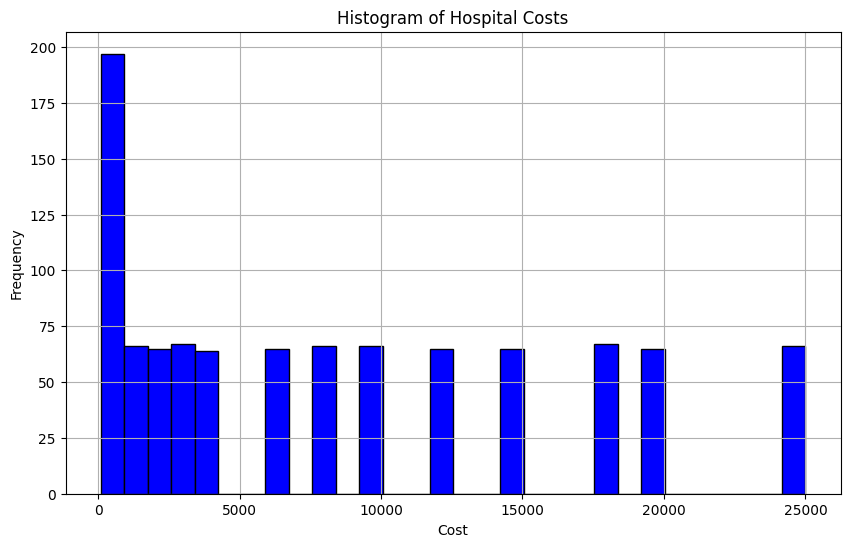


Linear Regression Evaluation (Cost vs Length of Stay):
R2 Score: 0.013
MAE: 6545.85
MSE: 58027386.04
RMSE: 7617.57
Intercept: 6954.86
Slope: 41.81


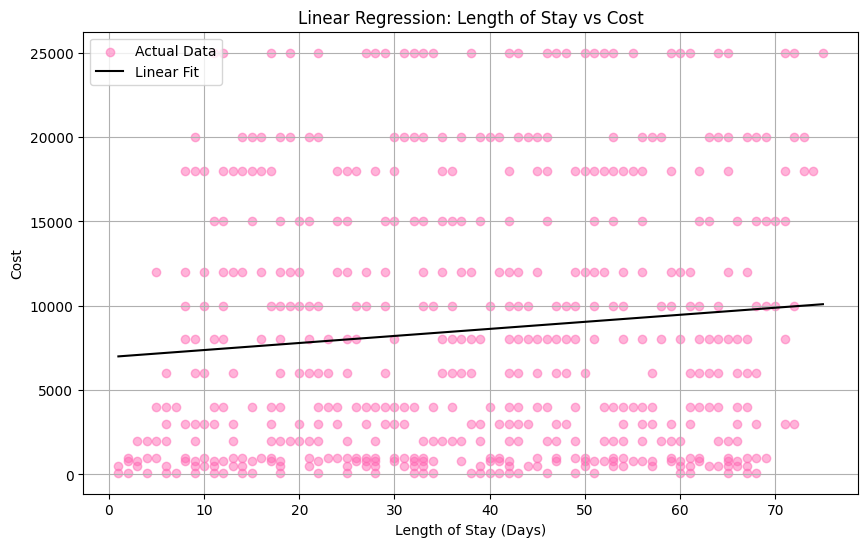

Correlation between Length of Stay and Cost: 0.1142061945063815

Polynomial Regression (Degree 3) Evaluation:
R2 Score: 0.032
MAE: 6430.64
MSE: 56965152.10
RMSE: 7547.53
Intercept: 2706.43
Coefficients: [ 0.00000000e+00  6.53234112e+02 -2.06743561e+01  1.90771505e-01]


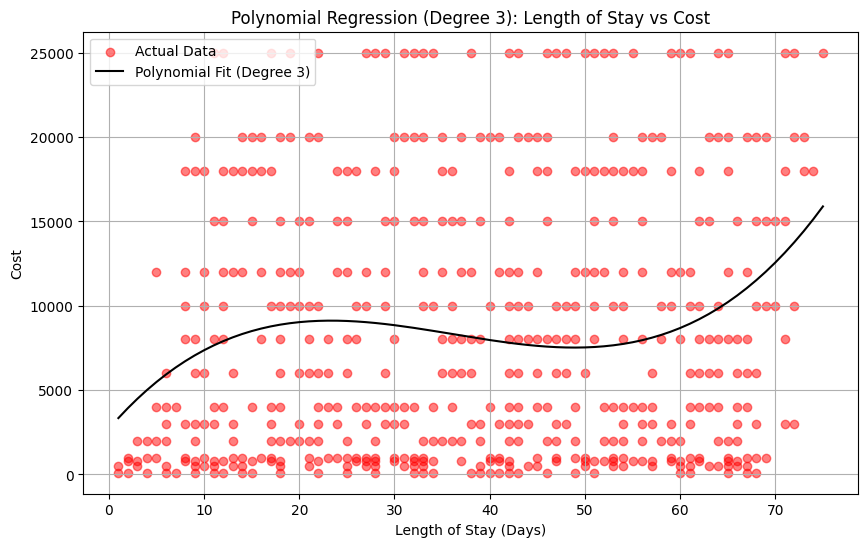

Scaled Feature Sample (Length_of_Stay):
   Length_of_Stay
0       -1.667715
1       -1.769830
2       -1.871945
3       -1.565601
4       -1.412429

Multiple Regression Evaluation:
R2 Score: 0.235
MAE: 5514.30
MSE: 45014485.66
RMSE: 6709.28
Intercept: 27543.76
Coefficients: {'Age': np.float64(-42.831676310320226), 'Length_of_Stay': np.float64(564.1040212639582), 'Satisfaction': np.float64(-4637.463553208111)}


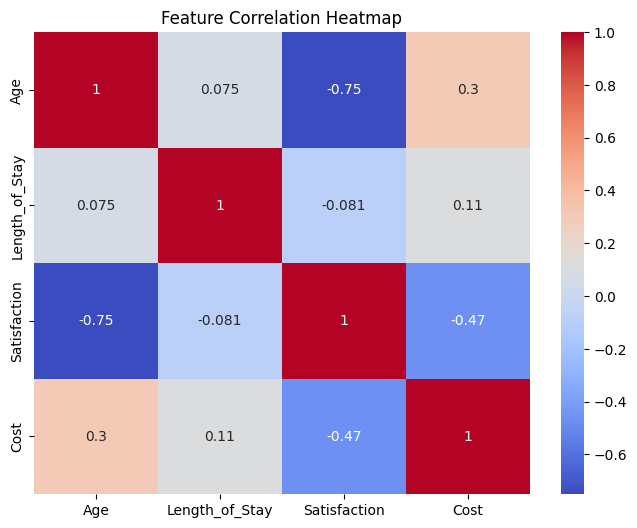

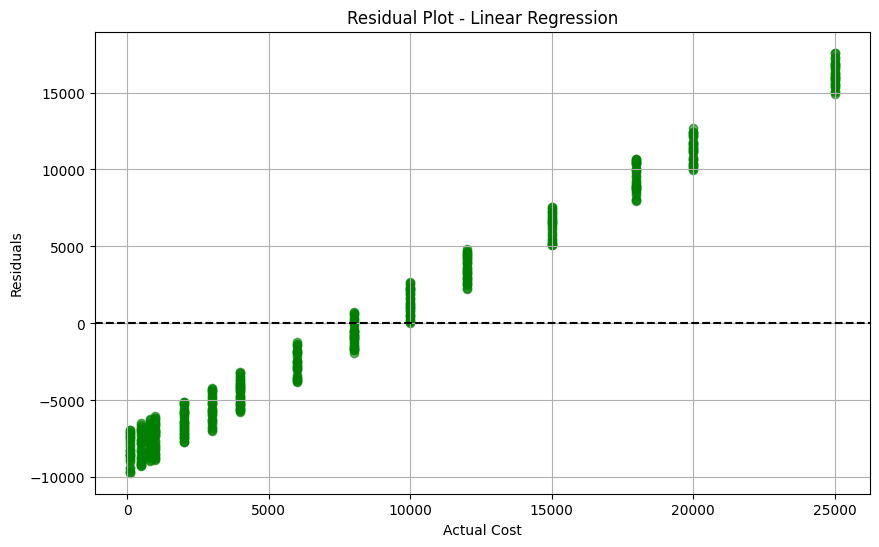

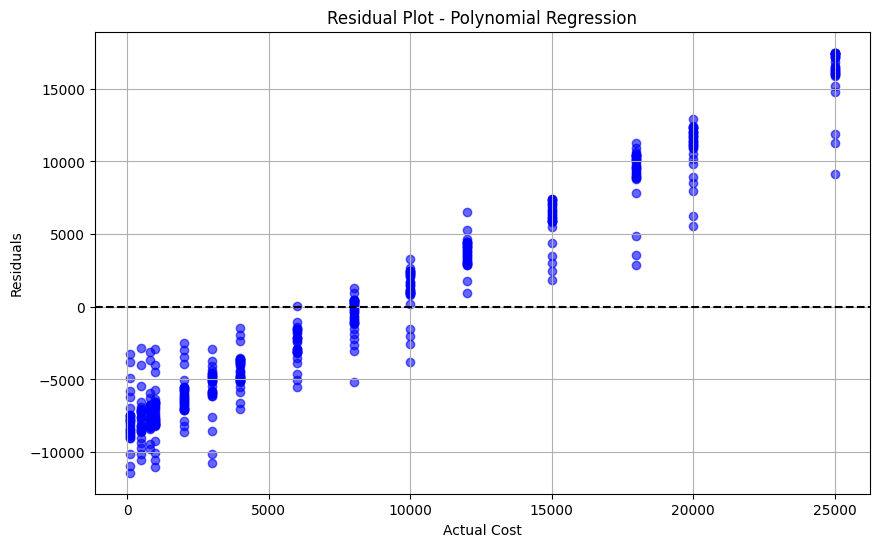

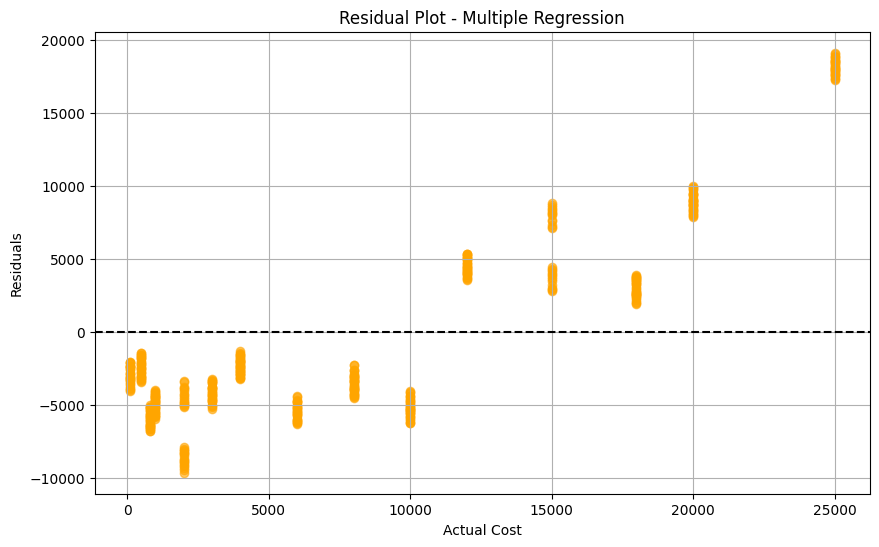


Model Comparison Summary:
            Model  R2 Score          MAE         RMSE
0          Linear  0.013455  6545.854235  7617.570875
1  Polynomial (3)  0.031514  6430.635386  7547.526224
2        Multiple  0.234692  5514.303466  6709.283543


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\ML_Project\hospital data.csv")

# Check for Missing Values
print("Missing Values in Dataset")
print(df.isnull().sum())
print("\n")

# Mean, Median, Mode
mean_cost = np.mean(df['Cost'])
median_cost = np.median(df['Cost'])
mode_cost = df['Cost'].mode()[0]

print(f"Mean Cost: {mean_cost:.2f}")
print(f"Median Cost: {median_cost:.2f}")
print(f"Mode Cost: {mode_cost}")
print("\n")

# Variance and Standard Deviation
var_cost = np.var(df['Cost'], ddof=1)
std_cost = np.std(df['Cost'], ddof=1)
print(f"Variance: {var_cost:.2f}")
print(f"Standard Deviation: {std_cost:.2f}")
print("\n")

# Percentiles
percentiles = np.percentile(df['Cost'], [10, 30, 50, 70, 90])
print(f"10th, 30th, 50th, 70th, 90th percentiles: {percentiles}")
print("\n")

# Histogram of Cost
plt.figure(figsize=(10,6))
plt.hist(df['Cost'], bins=30, color='blue', edgecolor='black')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Histogram of Hospital Costs")
plt.grid(True)
plt.show()

# Simple Linear Regression
X = df[['Length_of_Stay']]
y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

# Evaluation - Simple Linear Regression
print("\nLinear Regression Evaluation (Cost vs Length of Stay):")
print(f"R2 Score: {r2_score(y_test, y_pred_lin):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lin):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lin)):.2f}")
print(f"Intercept: {model_lin.intercept_:.2f}")
print(f"Slope: {model_lin.coef_[0]:.2f}")

# Plot - Simple Linear Regression
sorted_indices = X_test['Length_of_Stay'].argsort()
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='hotpink', alpha=0.5, label='Actual Data')
plt.plot(X_test.values.flatten()[sorted_indices], y_pred_lin[sorted_indices], color='black', label='Linear Fit')
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Cost")
plt.title("Linear Regression: Length of Stay vs Cost")
plt.legend()
plt.grid(True)
plt.show()

print("Correlation between Length of Stay and Cost:", df['Length_of_Stay'].corr(df['Cost']))

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluation - Polynomial Regression
print("\nPolynomial Regression (Degree 3) Evaluation:")
print(f"R2 Score: {r2_score(y_test, y_pred_poly):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
print(f"Intercept: {model_poly.intercept_:.2f}")
print(f"Coefficients: {model_poly.coef_}")

# Plot - Polynomial Regression
X_sorted = pd.DataFrame(np.sort(X_test.values.reshape(-1,1), axis=0), columns=['Length_of_Stay'])
X_poly_sorted = poly.transform(X_sorted)
y_poly_sorted = model_poly.predict(X_poly_sorted)

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Actual Data')
plt.plot(X_sorted, y_poly_sorted, color='black', label='Polynomial Fit (Degree 3)')
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Cost")
plt.title("Polynomial Regression (Degree 3): Length of Stay vs Cost")
plt.legend()
plt.grid(True)
plt.show()

# Feature Scaling
scaler = StandardScaler()
df[['Length_of_Stay']] = scaler.fit_transform(df[['Length_of_Stay']])
print("Scaled Feature Sample (Length_of_Stay):")
print(df[['Length_of_Stay']].head())

# Multiple Linear Regression
features = ['Age', 'Length_of_Stay', 'Satisfaction']
X_multi = df[features]
y_multi = df['Cost']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.5, random_state=50)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

# Evaluation - Multiple Regression
print("\nMultiple Regression Evaluation:")
print(f"R2 Score: {r2_score(y_test_m, y_pred_m):.3f}")
print(f"MAE: {mean_absolute_error(y_test_m, y_pred_m):.2f}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_m):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_m, y_pred_m)):.2f}")
print(f"Intercept: {model_multi.intercept_:.2f}")
print(f"Coefficients: {dict(zip(features, model_multi.coef_))}")

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + ['Cost']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Residual Plots
def plot_residuals(y_true, y_pred, title, color):
    plt.figure(figsize=(10,6))
    plt.scatter(y_true, y_true - y_pred, color=color, alpha=0.6)
    plt.axhline(0, color='black', linestyle='--')
    plt.title(f"Residual Plot - {title}")
    plt.xlabel("Actual Cost")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

plot_residuals(y_test, y_pred_lin, "Linear Regression", "green")
plot_residuals(y_test, y_pred_poly, "Polynomial Regression", "blue")
plot_residuals(y_test_m, y_pred_m, "Multiple Regression", "orange")

# Summary Table
summary = pd.DataFrame({
    'Model': ['Linear', 'Polynomial (3)', 'Multiple'],
    'R2 Score': [r2_score(y_test, y_pred_lin),
                 r2_score(y_test, y_pred_poly),
                 r2_score(y_test_m, y_pred_m)],
    'MAE': [mean_absolute_error(y_test, y_pred_lin),
            mean_absolute_error(y_test, y_pred_poly),
            mean_absolute_error(y_test_m, y_pred_m)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lin)),
             np.sqrt(mean_squared_error(y_test, y_pred_poly)),
             np.sqrt(mean_squared_error(y_test_m, y_pred_m))]
})

print("\nModel Comparison Summary:")
print(summary)
